In [1]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

In [2]:
from genetic_selection import GeneticSelectionCV

C:\ProgramData\Anaconda3\lib\site-packages\deap\tools\_hypervolume\pyhv.py:33: ImportWarning: Falling back to the python version of hypervolume module. Expect this to be very slow.
  "module. Expect this to be very slow.", ImportWarning)


In [3]:
from sklearn.metrics import make_scorer, accuracy_score, fbeta_score

In [4]:
training_mean = pd.read_csv("data/training_mean.csv").set_index('sessionNo')
testing_mean = pd.read_csv("data/testing_mean.csv").set_index('sessionNo')

In [5]:
def splitData(df):
    x = df.iloc[:, :-1]
    y = df['order']
    return x, y

In [6]:
x_train, y_train = splitData(training_mean)
x_test, y_test = splitData(testing_mean)

In [7]:
tree = DecisionTreeClassifier(criterion='entropy',max_depth=None, min_samples_split=2,random_state=0)

In [8]:
from my_score_module import custom_score

my_scorer = make_scorer(custom_score, greater_is_better=False)

def geneticSearch(df, estimator, population, crossover, generations, mutation):
    X = df.iloc[:,:-1].values
    y = df.iloc[:,-1].values
    selector = GeneticSelectionCV(estimator,
                                  cv=3,
                                  verbose=0,
                                  scoring="accuracy",
                                  n_population=population,
                                  crossover_proba=crossover,
                                  mutation_proba=mutation,
                                  n_generations=generations,
                                  crossover_independent_proba=0.5,
                                  mutation_independent_proba=0.05,
                                  tournament_size=3,
                                  caching=True,
                                  n_jobs=-1)
    selector = selector.fit(X, y)
    return selector
selectors = []
for g in range(5,500,5):
    selector = geneticSearch(training_mean,tree,25,0.6,g,0.01)
    selectors.append(selector.support_)

In [9]:
def errorDecisionTree(tree, df_train, df_test):
    x_train, y_train = splitData(df_train)
    x_test, y_test = splitData(df_test)
    tree.fit(x_train,y_train)
    error = abs(y_test - tree.predict(x_test)).sum()
    return error

In [10]:
erros = []
for i in range(len(selectors)):
        df_train = training_mean.copy()
        df_test = testing_mean.copy()
        for j in range(len(training_mean.columns)-1):
            if(not selectors[i][j]):
                del df_train[training_mean.columns[j]]
                del df_test[training_mean.columns[j]]
        erros.append(errorDecisionTree(tree,df_train,df_test))

In [11]:
import matplotlib.pyplot as plt

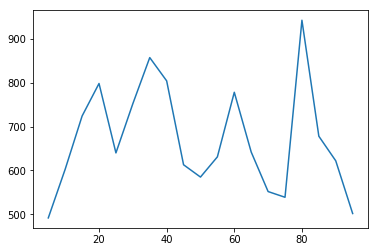

492.0

In [17]:
plt.plot(list(range(5,100,5)),erros)
plt.show()
min(erros)

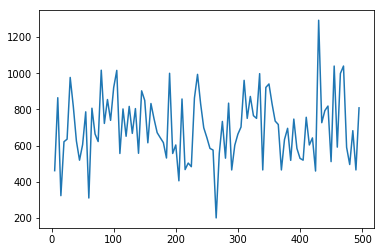

201.0

In [12]:
plt.plot(list(range(5,500,5)),erros)
plt.show()
min(erros)

In [13]:
selectors

[array([False, False, False, False, False, False, False,  True, False,
        False,  True,  True, False,  True, False, False, False, False,
        False,  True, False], dtype=bool),
 array([False, False, False, False,  True,  True,  True,  True, False,
        False,  True,  True,  True,  True,  True, False, False,  True,
        False, False, False], dtype=bool),
 array([False, False, False,  True, False, False, False,  True, False,
        False, False,  True,  True, False, False,  True, False,  True,
        False,  True,  True], dtype=bool),
 array([False, False, False, False, False, False,  True,  True, False,
        False,  True,  True,  True, False,  True,  True,  True,  True,
         True,  True, False], dtype=bool),
 array([False, False,  True,  True,  True,  True,  True, False,  True,
        False,  True,  True, False,  True,  True,  True, False,  True,
        False,  True,  True], dtype=bool),
 array([False, False, False,  True,  True, False, False,  True, False,
    